# OpenFL - Decentralized Federated Learning on Public Blockchain Systems
### by Anton Wahrstätter, Sajjad Khan & Davor Svetinovic

## CIFAR-10 DATASET GANACHE SIMULATION

### Contents
* [Experiment](#Deploy-Challenger-Contract-and-Start-Experiment)
* [Visualization](#Visualize-Experiment)
* [Individual Transactions](#Transactions)
* [Contracts and Participants](#Contracts-and-Paricipants-(Latex-format))
* [Gas Costs](#Table-with-Gas-Info-(Latex-format))

### Imports
The imports consist of the following:
* PytorchModel - which is the wrapper for the Convolutional Network
* FLManager - the wrapper for the Manager contract
* FLChallenge - the wrapper for the Challenge contract

In [1]:
from pytorch_model import PytorchModel
from smartcontracts import FLManager, FLChallenge

### Select data set

In [2]:
DATASET = "cifar-10"
#DATASET = "mnist"

### RPC Provider

The RPC provides the connection to the respective blockchain, for example Ethereum or the Robsten testnet.

In [3]:
with open("rpc_endpoint.txt", "r") as file:
    RPC_ENDPOINT = file.read()

### Configurations

In [4]:
NUMBER_OF_GOOD_CONTRIBUTORS = 6
NUMBER_OF_BAD_CONTRIBUTORS = 1
NUMBER_OF_FREERIDER_CONTRIBUTORS = 1
NUMBER_OF_INACTIVE_CONTRIBUTORS = 0

REWARD = int(1e18) #     1 ETH = 10^18 wei
MINIMUM_ROUNDS = 3
MIN_BUY_IN = int(1e18)   #1 ETH
MAX_BUY_IN = int(1.8e18) #1.8 ETH
STANDARD_BUY_IN = int(1e18) #1 ETH
EPOCHES = 1
BATCH_SIZE = 128
PUNISHFACTOR = 3
FIRST_ROUND_FEE = 50 # 50% OF MIN DEPOSIT

FORK = True # Fork Chain or communicate directly with RPC

NUMBER_OF_CONTRIBUTERS = NUMBER_OF_GOOD_CONTRIBUTORS      + \
                         NUMBER_OF_BAD_CONTRIBUTORS       + \
                         NUMBER_OF_FREERIDER_CONTRIBUTORS + \
                         NUMBER_OF_INACTIVE_CONTRIBUTORS

In [5]:
# Only for the real-net simulation
# In order to use a non-locally forked blockchain, 
# private keys are required to unlock accounts
if FORK == False:
    from web3 import Web3
    w3 = Web3(Web3.HTTPProvider(RPC_ENDPOINT))
    PRIVKEYS = []
    with open("private_keys.txt", "r") as file:
        for f in file:
            PRIVKEYS.append(f.split(":")[0])

    PRIVKEYS = [w3.eth.account.privateKeyToAccount(i) for i in PRIVKEYS]
else:
    PRIVKEYS = None

### Initialized Deep Learning Model and add Participants

In [6]:
pytorch_model = PytorchModel(DATASET, 
                             NUMBER_OF_GOOD_CONTRIBUTORS, 
                             NUMBER_OF_CONTRIBUTERS, 
                             EPOCHES, 
                             BATCH_SIZE, 
                             STANDARD_BUY_IN,
                             MAX_BUY_IN)

for i in range(NUMBER_OF_BAD_CONTRIBUTORS):
    pytorch_model.add_participant("bad",3)

for i in range(NUMBER_OF_FREERIDER_CONTRIBUTORS):
    pytorch_model.add_participant("freerider",1)
    
for i in range(NUMBER_OF_INACTIVE_CONTRIBUTORS):
    pytorch_model.add_participant("inactive",1)

Data Loaded:
Nr. of images for training: 50,000
Nr. of images for testing:  10,000

Pytorch Model created:

Net_CIFAR(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Bad User
Participant added: Freerider User


### Initialize and Deploy Manager Contract

In [7]:
manager = FLManager(pytorch_model, True).init(NUMBER_OF_GOOD_CONTRIBUTORS, 
                                              NUMBER_OF_BAD_CONTRIBUTORS,
                                              NUMBER_OF_FREERIDER_CONTRIBUTORS,
                                              NUMBER_OF_INACTIVE_CONTRIBUTORS,
                                              MINIMUM_ROUNDS,
                                              RPC_ENDPOINT,
                                              FORK,
                                              PRIVKEYS)
manager.buildContract()

Connected: True
Client: Ganache/v7.7.3/EthereumJS TestRPC/v7.7.3/ethereum-js
Chain ID: 1337
Latest block: 169
Accounts: ['0x0b12EB2c66f80E9a36556FB31C91dA527e40841b', '0x5EBC77039DC7B9Af3DC103F1855a32495e1847c1', '0xb891e31bE7aeC98007CC1eda576708685DCBA69d']
Default account: <web3._utils.empty.Empty object at 0x00000209970A4DC0>
New Default account: 0x0b12EB2c66f80E9a36556FB31C91dA527e40841b
Connected to Ethereum: True
initiated Ganache-Client @ Block Nr. 169

Total Contributers:       8
Good Contributers:        6 (75%)
Malicious Contributers:   1 (12%)
Freeriding Contributers:  1 (12%)
Inactive Contributers:    0 (0%)
Learning Rounds:          3
-----------------------------------------------------------------------------------
Account initiated @ Address 0x0b12EB2c66f80E9a36556FB... with 989.4 ETH | FAIR USER
Account initiated @ Address 0x5EBC77039DC7B9Af3DC103F... with 995.2 ETH | FAIR USER
Account initiated @ Address 0xb891e31bE7aeC98007CC1ed... with 995.0 ETH | FAIR USER
Account 

### Deploy Challenger Contract and Start Experiment

In [8]:
configs = manager.deployChallengeContract(MIN_BUY_IN,
                                          MAX_BUY_IN,
                                          REWARD, 
                                          MINIMUM_ROUNDS,
                                          PUNISHFACTOR,
                                          FIRST_ROUND_FEE)

model = FLChallenge(manager, 
                    configs,
                    pytorch_model)


model.simulate(rounds=MINIMUM_ROUNDS)

Starting simulation...
-----------------------------------------------------------------------------------

Model deployed    @ Address 0x8aeF2326E047400EB4E72900bd05BDe84137055e | 1d97cc...

-----------------------------------------------------------------------------------
Account registered: 0x0b12EB2c66f80E... | 1d97cc... | 1,028,126,604,539,059,456 WEI
Account registered: 0x5EBC77039DC7B9... | b4bd8a... | 1,053,864,108,589,480,960 WEI
Account registered: 0xb891e31bE7aeC9... | 8ac597... | 1,022,804,564,127,132,672 WEI
Account registered: 0x622F728c102ccE... | 967dc8... | 1,474,312,807,328,152,064 WEI
Account registered: 0xE9Ce824926e53F... | ea8049... | 1,723,500,260,988,381,184 WEI
Account registered: 0xCcebFB97cd1346... | f6c173... | 1,372,504,114,042,793,984 WEI
Account registered: 0x96895EB4B00F27... | 9890f4... | 1,042,726,396,785,656,960 WEI
Account registered: 0x51DC2F7677Ee29... | abb9f9... | 1,273,253,630,420,821,760 WEI
----------------------------------------------------

### Visualize Experiment 

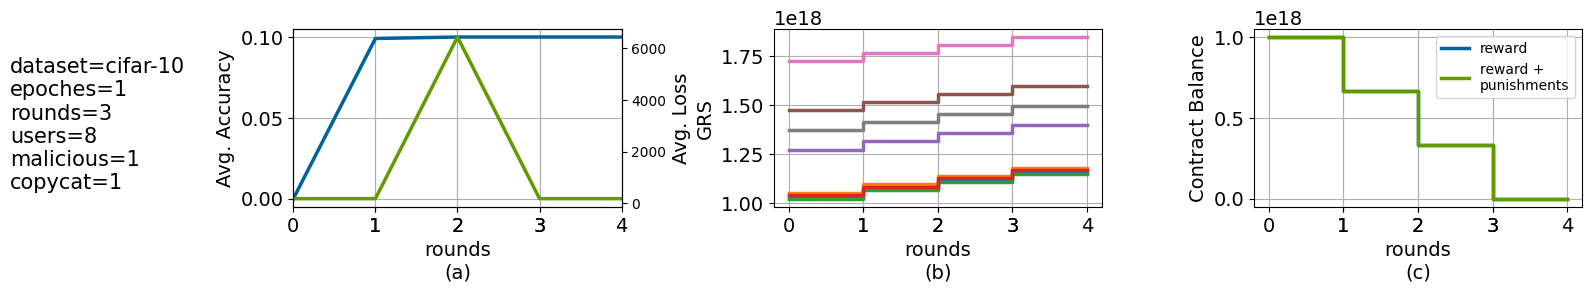

In [9]:
model.visualize_simulation()

### Transactions

In [11]:
print("{:<10} - {:^64} -    Gas Used - {}".format("Function", "Transaction Hash", "Success"))
print("------------------------------------------------------------------------------------------")
for f, txhash in model.txHashes:
    r = model.w3.eth.wait_for_transaction_receipt(txhash)
    if r["status"] == 1:
        success = "✅"
    else:
        success = "FAIL"
    
    gas = r["gasUsed"]
    print("{:<10} - {} - {:>9,.0f} -   {}".format(f, txhash, gas, success))

Function   -                         Transaction Hash                         -    Gas Used - Success
------------------------------------------------------------------------------------------
register   - b4bd8ad138761e7bbb98cf1396a0b4a49d0e6682e36c7918e46807f1caafe223 -   127,396 -   ✅
register   - 8ac5972dce8cddc9dd5e4d0dc1e50fbcb07e70d4f67eea2cf3af93a157a87b54 -   127,396 -   ✅
register   - 967dc8bcf7c25ae5cfd8a1d46b5b5169492b91d5b08e4308918f1633b9e56070 -   127,396 -   ✅
register   - ea80499ab77081f3df6b991620c33527765cfcf8254ac1f92d3cf87b12335172 -   127,396 -   ✅
register   - f6c1739a7b3ad41f4ef938ff82daa6bc143d3565cf8959f81747b251340738b4 -   127,396 -   ✅
register   - 9890f445b11202c97a4c982fc85dca111746e59ecbe4489b9fa64117331e071e -   127,396 -   ✅
register   - abb9f9c8538db7c8742aa7c5c14babe49a130f6a4d5ca55786188a8fd40e0404 -   127,396 -   ✅
slot       - 52c87a3cec9fc3642a1837c797e8e42995e16d9d38fc56faec61008e93166d87 -    51,173 -   ✅
slot       - 35823b6f21b2daf29fd608558b

### Contracts and Paricipants (Latex format)

In [12]:
print("\\renewcommand{\\arraystretch}{1.3}")
print("\\begin{center}")
print("\\begin{tabular}{ c|c }")

print("Contract & Address (Ropsten Testnet) \\\ ")
print("\\hline")
print("Ma-1 & {} \\\ ".format(manager.manager.address))
print("Ch-1 & {} \\\ ".format(model.model.address))
for i, p in enumerate(model.pytorch_model.participants[:-1] + \
                           model.pytorch_model.disqualified + \
                           [model.pytorch_model.participants[-1]]):
    print("P-{}  & {} \\\ ".format(i+1, p.address))

print("\\end{tabular}")
print("\\end{center}")

\renewcommand{\arraystretch}{1.3}
\begin{center}
\begin{tabular}{ c|c }
Contract & Address (Ropsten Testnet) \\ 
\hline
Ma-1 & 0x608391D69F67C534ec80f2fC3CC53C161243D505 \\ 
Ch-1 & 0x8aeF2326E047400EB4E72900bd05BDe84137055e \\ 
P-1  & 0x0b12EB2c66f80E9a36556FB31C91dA527e40841b \\ 
P-2  & 0x5EBC77039DC7B9Af3DC103F1855a32495e1847c1 \\ 
P-3  & 0xb891e31bE7aeC98007CC1eda576708685DCBA69d \\ 
P-4  & 0x622F728c102ccEc92f29D317519F530CbC8156e2 \\ 
P-5  & 0xE9Ce824926e53FFb6a201d5BF5223174503E83b4 \\ 
P-6  & 0xCcebFB97cd13461dEa89191B3142aE339D4E19BD \\ 
P-7  & 0x96895EB4B00F27Bc70BA9a991764a5d722F40956 \\ 
P-8  & 0x51DC2F7677Ee2920962b7326Eca053c27Afe5ce9 \\ 
\end{tabular}
\end{center}


### Table with Gas Info (Latex format)

In [13]:
reg = model.gas_register, "register"
fed = model.gas_feedback, "feedback"
clo = model.gas_close, "settle round"
slo = model.gas_slot, "reserve slot"
wei = model.gas_weights, "provide weights**"
dep = manager.gas_deploy, "deployment"
dep = manager.gas_deploy, "deployment"
ext = model.gas_exit, "exit"

tot  = 0
tot2 = 0

print("\\begin{tabular}{ |c|c|c| }\n\hline\nFunction & Gas Amount & Gas Costs*\\\ \n\hline")
for i, f in [reg,slo,wei,fed,clo]:
    print("{} & {:,.0f} & {:.5f} ETH \\\ ".format(f, sum(i)/len(i), sum(i)/len(i) * 20e9 / 1e18 ))
    tot += sum(i)/len(i)
    if i != clo[0]:
            tot2 += sum(i)/len(i)
        
print("\hline\n\hline")
print("complete round & {:,.0f} & {:.5f} \\\ ".format(tot, tot * 20e9 / 1e18))
print("\hline\n\end{tabular}")

\begin{tabular}{ |c|c|c| }
\hline
Function & Gas Amount & Gas Costs*\\ 
\hline
register & 127,396 & 0.00255 ETH \\ 
reserve slot & 51,183 & 0.00102 ETH \\ 
provide weights** & 60,020 & 0.00120 ETH \\ 
feedback & 367,863 & 0.00736 ETH \\ 
settle round & 754,350 & 0.01509 ETH \\ 
\hline
\hline
complete round & 1,360,812 & 0.02722 \\ 
\hline
\end{tabular}
